In [31]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
pos = np.fromfile(open('/Users/timrudge/Code/InfoTracking/pos.np','rt'), sep=',')
ll = np.fromfile(open('/Users/timrudge/Code/InfoTracking/ll.np','rt'), sep=',')

In [33]:
print pos.shape
print ll.shape
17*29*20*2

(49000,)
(5512500,)


19720

In [34]:
pos = pos.reshape((35*35,20,2))

[355]


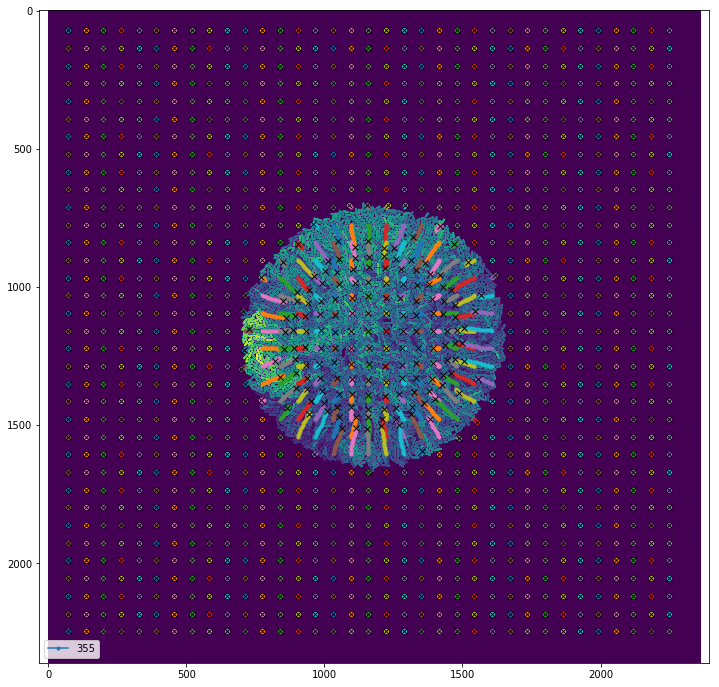

In [36]:
idx = np.random.uniform(0,35*35,size=(4,1)).astype(np.int)
idx=[355]
#idx = np.where(pos[idx,:,0]<)
plt.figure(figsize=(12,12))
plt.plot(pos[:,0:-1,1].squeeze().transpose(),pos[:,0:-1,0].squeeze().transpose(),'.-')
plt.plot(pos[:,-1,1].squeeze().transpose(),pos[:,-1,0].squeeze().transpose(),'kx')
#im = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%200).astype(np.float32)
im = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%190).astype(np.float32)
plt.imshow(im)
plt.axis('equal')

print idx
plt.legend(idx)

#plt.figure()
#ll = ll.reshape((17*29,50,15,15))
#plt.imshow(ll[400,1,:,:])


255.0


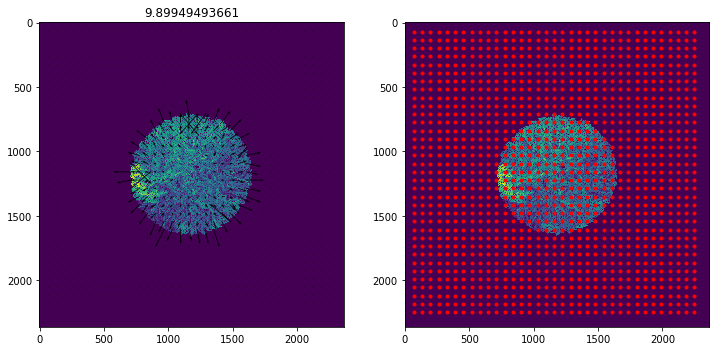

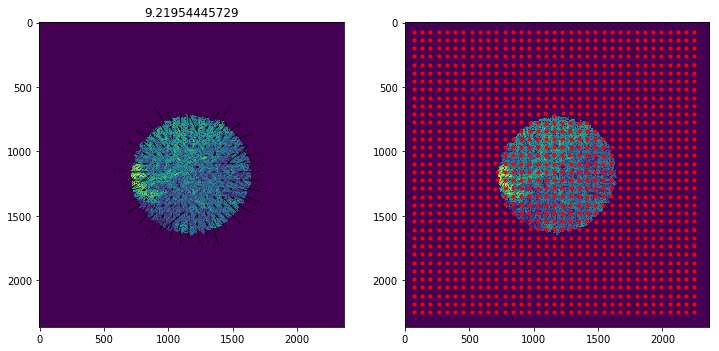

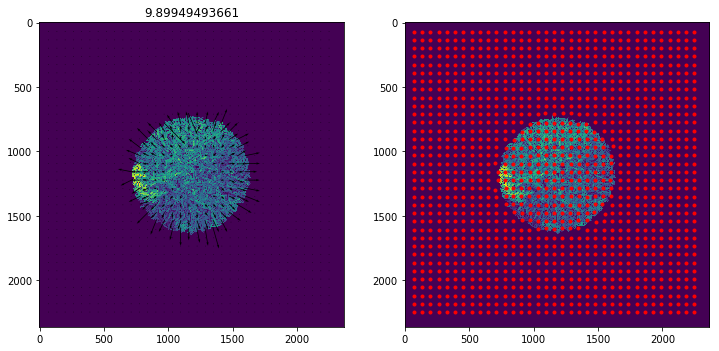

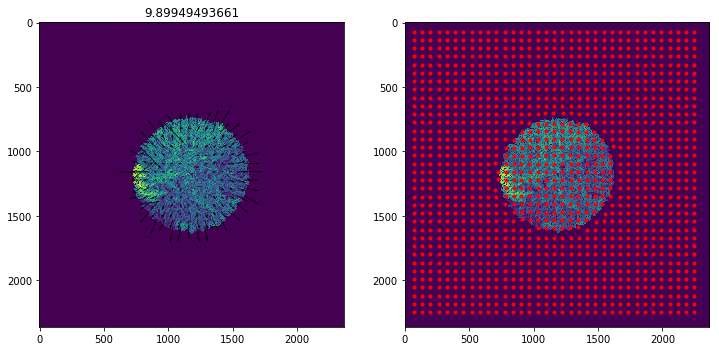

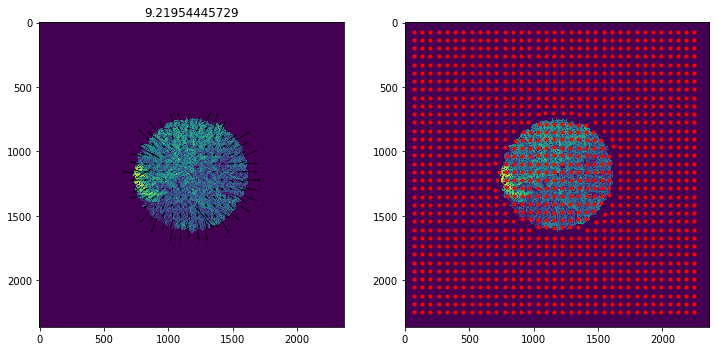

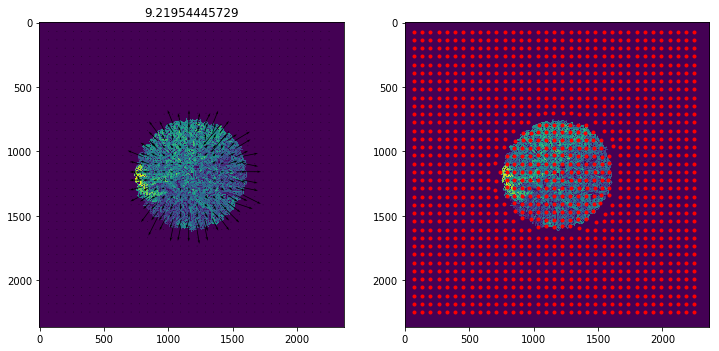

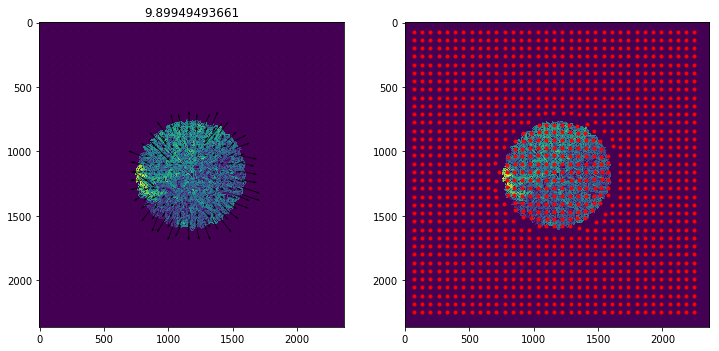

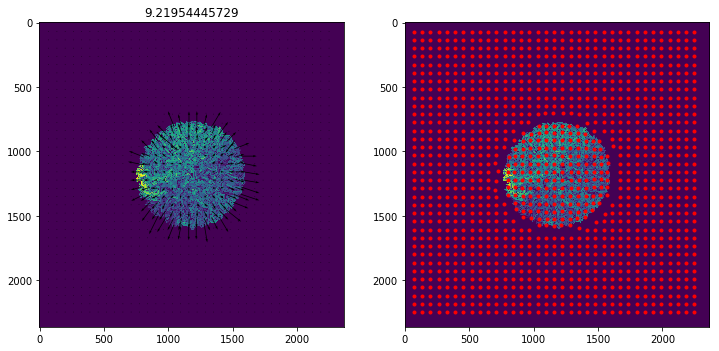

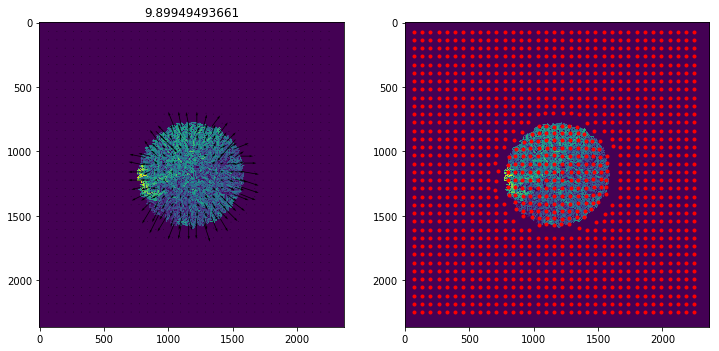

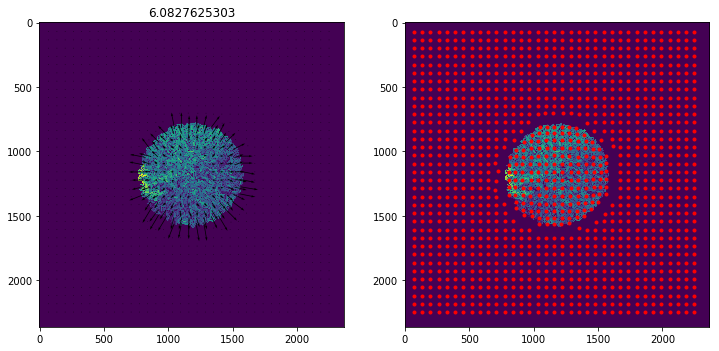

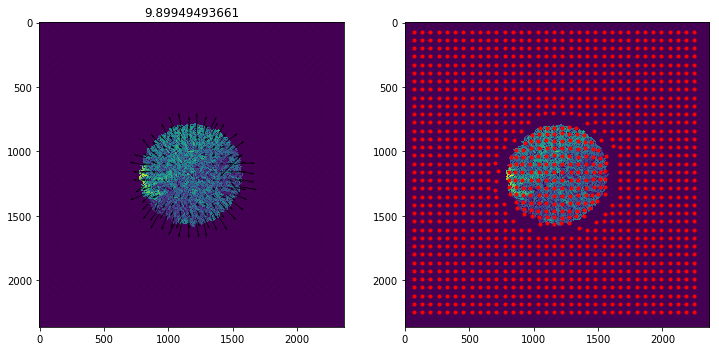

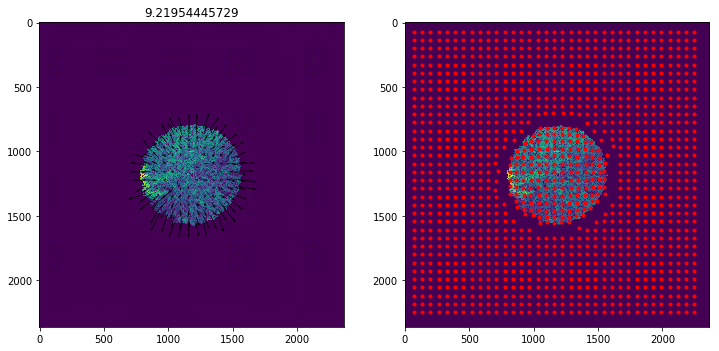

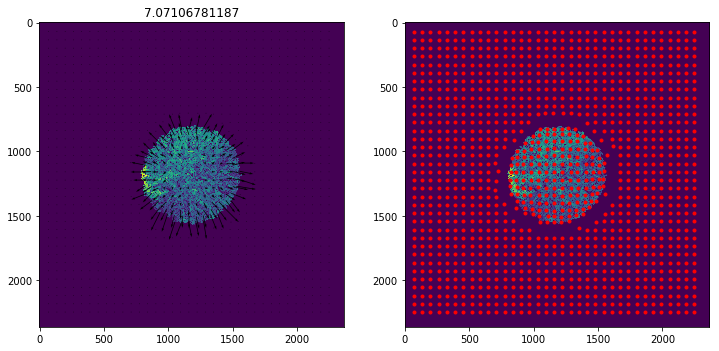

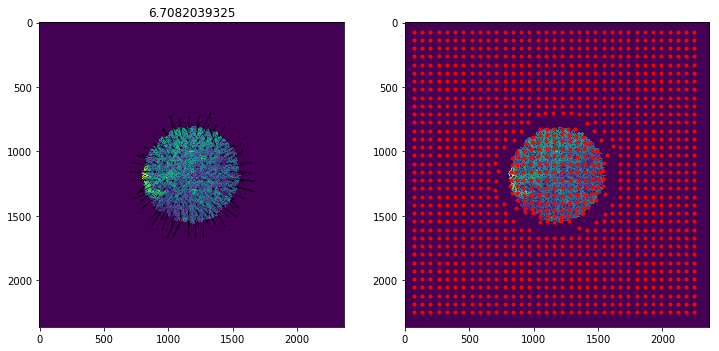

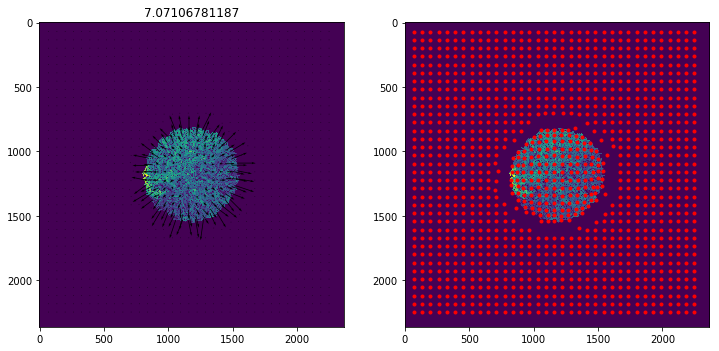

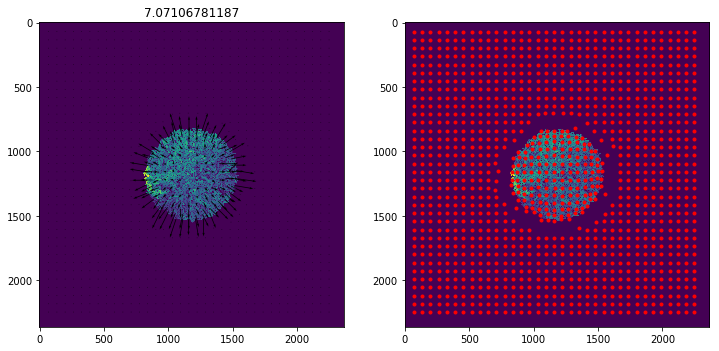

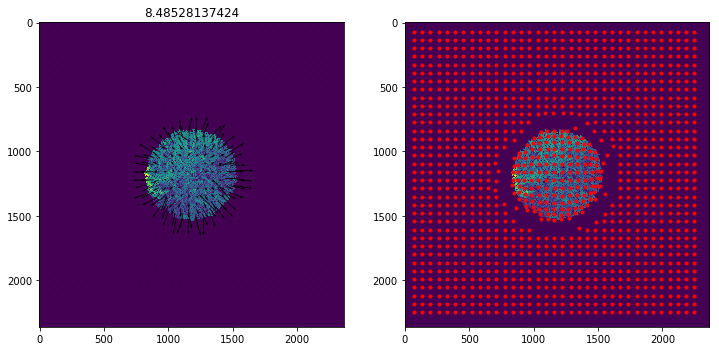

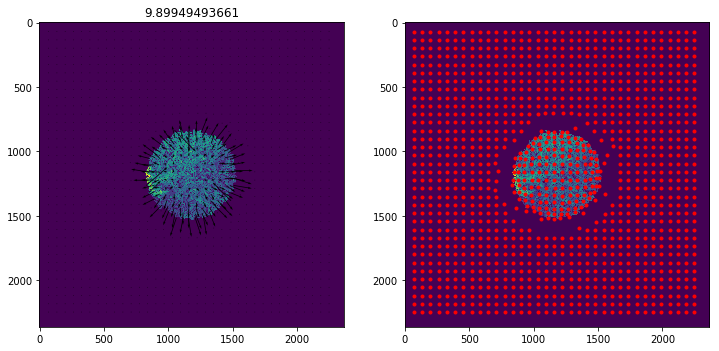

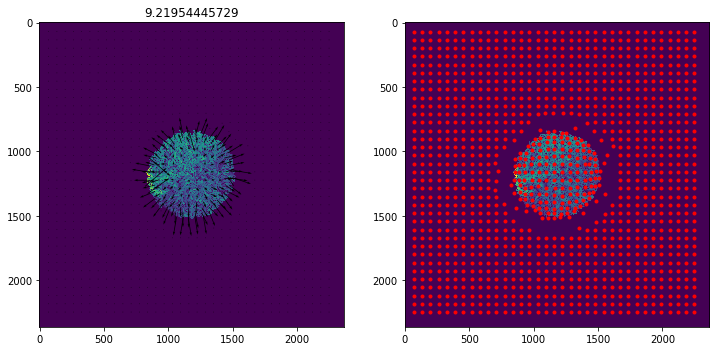

In [37]:
#im1 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%250).astype(np.float32)
im1 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%180).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%150).astype(np.float32)
im2 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%150).astype(np.float32)
w,h = im1.shape
plt.figure(figsize=(18,18))
rgb = np.zeros(im1.shape+(3,))
rgb[:,:,0] = im1/np.max(im1, axis=(0,1))
rgb[:,:,1] = im2/np.max(im2, axis=(0,1))
#plt.imshow(im1)
#plt.plot(pos[:,0:-1:5,1].transpose(),pos[:,0:-1:5,0].transpose(),'.-')
#plt.plot(pos[:,-1,1].transpose(),pos[:,-1,0].transpose(),'wx')


print np.max(im2, axis=(0,1))
_,nt,_ = pos.shape
for t in range(1,nt):
    plt.figure(figsize=(12,12))
    im1 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%((nt-t)*2+150)).astype(np.float32)
    im2 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%((nt-t-1)*2+150)).astype(np.float32)

    #im1 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%((nt-t)*2+100)).astype(np.float32)
    #im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%((nt-t-1)*2+100)).astype(np.float32)

    plt.subplot(1,2,1)
    
    plt.imshow(im1)
    '''
    px = pos[:,:,t,1]
    py = pos[:,:,t,0]
    vy = pos[:,:,t+1,1]-pos[:,:,t,1]
    vx = pos[:,:,t+1,0]-pos[:,:,t,0]
    '''
    #plt.plot([pos[:,t,1],pos[:,t-1,1]],[pos[:,t,0],pos[:,t-1,0]], 'r-')
    vel = pos[:,t,:]-pos[:,t-1,:]
    mvel = np.sqrt(vel[:,0]**2 + vel[:,1]**2)
    idx = np.where(mvel>=0)
    
    plt.title(np.max(mvel))
    #plt.plot(pos[idx,t,1],pos[idx,t,0], 'r.')
    plt.quiver(pos[idx,t,1], pos[idx,t,0], -vel[idx,1], vel[idx,0], scale=100) #0.00001,0.00001)
    
    plt.subplot(1,2,2)
    plt.imshow(im2)
    plt.plot(pos[idx,t-1,1],pos[idx,t-1,0], 'r.')

    plt.savefig('plotim%4d.png'%t)
    
    #, scale=0.001)
    


In [98]:
roi = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi.np','rt'), sep=',')
print roi.shape
print 64*64*20*17*29

(100966400,)
40386560


In [97]:
roi = roi.reshape((17,29,50,64,64))

NameError: name 'roi' is not defined

[ 775.  967.]
[ 776.  964.]
[ 776.  960.]
[ 778.  957.]
[ 777.  955.]
[ 776.  953.]
[ 775.  951.]
[ 774.  950.]
[ 774.  949.]
[ 773.  948.]
[ 773.  947.]
[ 772.  945.]
[ 771.  943.]
[ 770.  941.]
[ 768.  939.]
[ 767.  937.]
[ 767.  936.]
[ 767.  934.]
[ 765.  930.]
[ 763.  927.]


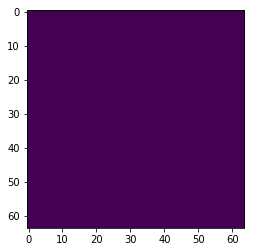

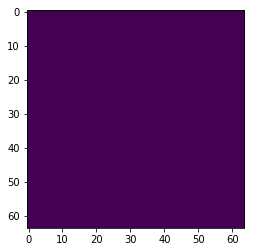

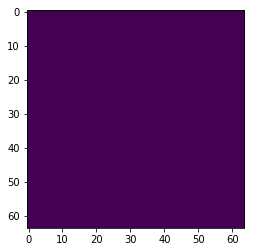

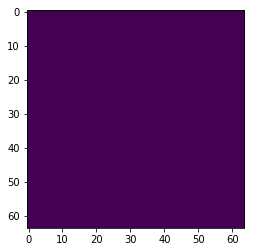

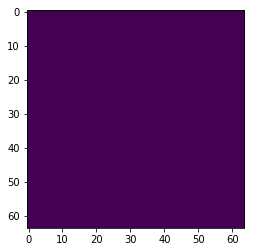

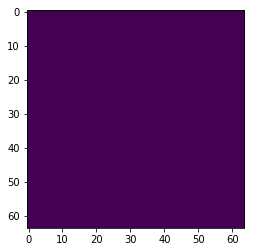

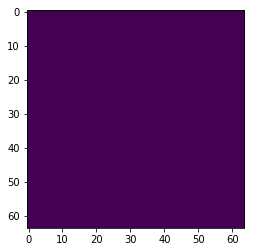

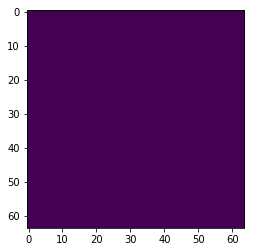

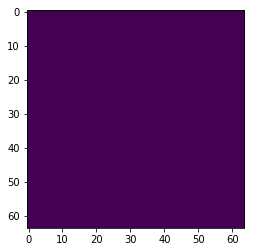

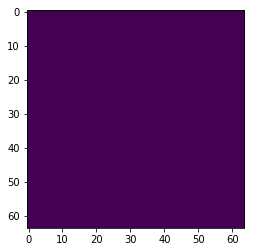

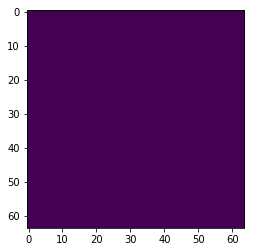

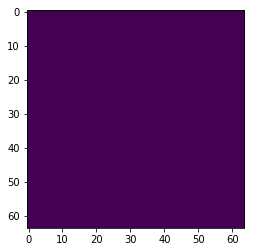

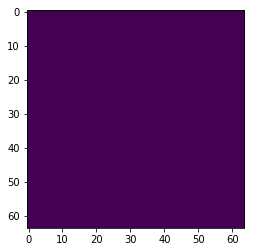

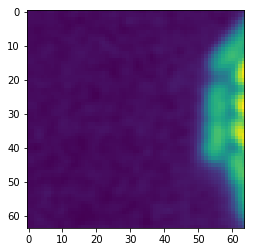

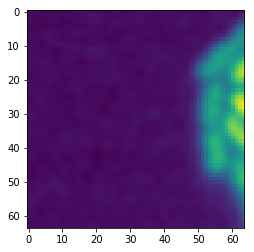

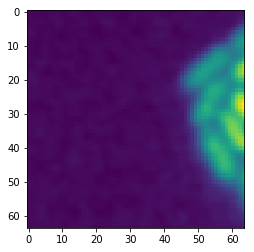

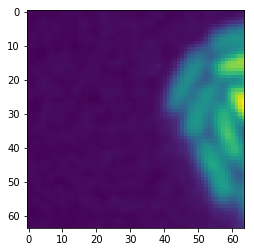

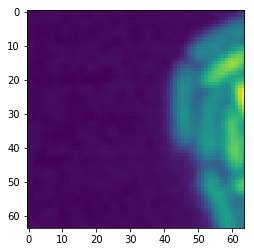

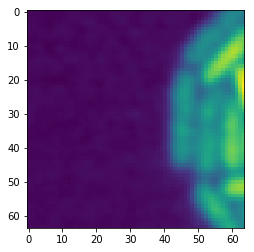

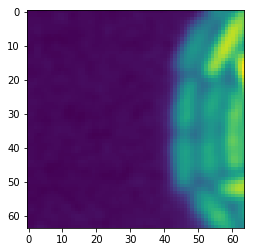

In [60]:
pos = pos.reshape((17,29,20,2))
for t in range(20):
    plt.figure()
    plt.imshow(roi[11,14,t,:,:])
    print pos[11,14,t,:]